In [59]:
# function for later confusion matrix, just to setup the figure etc 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data_path = '/home/ubuntu/data/titanic'
titanic_df = pd.read_csv(data_path + '/train.csv')
train_df = titanic_df 
test_df = pd.read_csv(data_path + '/test.csv')
# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
combine = [train_df, test_df]

# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

## Define our train and test sets

In [62]:
Y_train = titanic_df["Survived"]
X_train = titanic_df.drop(['Cabin','Survived', 'Sex', 'Embarked', 'Age'],axis=1)

X_test  = test_df.drop(['PassengerId','Cabin', 'Sex', 'Embarked', 'Age'],axis=1)

In [63]:
X_test.head()

,Pclass,SibSp,Parch,Fare
0,3,0,0,7.8292
1,3,1,0,7.0000
2,2,0,0,9.6875
3,3,0,0,8.6625
4,3,1,1,12.2875


In [64]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, Y_train)

0.83613916947250277

Confusion matrix, without normalization
[[515  34]
 [112 230]]


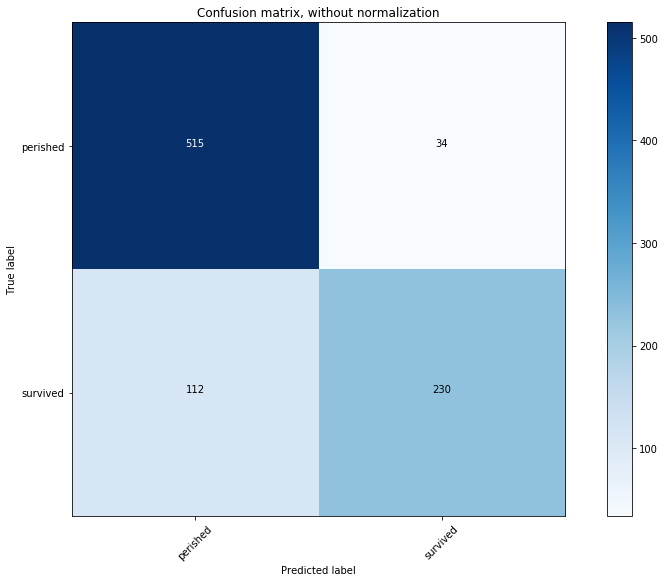

In [65]:
from sklearn.metrics import confusion_matrix

class_names = np.array(['perished', 'survived'])

Y_train_pred = clf.predict(X_train)
cnf_matrix = confusion_matrix(Y_train, Y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [66]:
titanic_df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Feature engineering

## Impute missing values

In [67]:
titanic_df.Age[titanic_df['Age'].isnull()] = titanic_df['Age'].median()
test_df.Age[test_df['Age'].isnull()] = test_df['Age'].median()

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## One hot encode categorical variables

In [68]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [69]:
# encode embarked column
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)
embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)


In [70]:
# bin and encode fare column

bins = [0, 10, 20, 30, 520]
group_names = ['Cheapest', 'Cheap', 'Middle', 'Expensive']
titanic_df['FareGroup'] = pd.cut(train_df['Fare'], bins, labels=group_names)

test_df['FareGroup'] = pd.cut(train_df['Fare'], bins, labels=group_names)

In [71]:
fare_dummies_titanic  = pd.get_dummies(titanic_df['FareGroup'])
fare_dummies_test  = pd.get_dummies(test_df['FareGroup'])

titanic_df = titanic_df.join(fare_dummies_titanic)
test_df    = test_df.join(fare_dummies_test)

titanic_df.drop(['FareGroup'], axis=1,inplace=True)
test_df.drop(['FareGroup'], axis=1,inplace=True)

In [72]:
# bin and encode fare column

bins = [0, 10, 20, 30, 520]
group_names = ['Cheapest', 'Cheap', 'Middle', 'Expensive']
titanic_df['FareGroup'] = pd.cut(train_df['Fare'], bins, labels=group_names)

test_df['FareGroup'] = pd.cut(train_df['Fare'], bins, labels=group_names)

In [73]:
# encode gender column

gender_code = {"male":0 ,"female":1}
titanic_df['Gender'] = titanic_df['Sex'].apply(gender_code.get).astype(float)
test_df['Gender'] = test_df['Sex'].apply(gender_code.get).astype(float)

In [74]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, Y_train)

0.83613916947250277

## Create extra columns

In [75]:
full_data = [titanic_df, test_df]

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
for dataset in full_data:
    dataset['Child'] = 0
    dataset.loc[dataset['Age'] < 16, 'Child'] = 1

In [79]:
Y_train = titanic_df["Survived"]
X_train = titanic_df.drop(['Cabin','Survived','Fare', 'Embarked', 'Sex', 'FareGroup'],axis=1)

X_test  = test_df.drop(['Cabin', 'Fare', 'Embarked', 'Sex', 'PassengerId', 'FareGroup'],axis=1)

In [80]:
X_train.head()

,Pclass,Age,SibSp,Parch,C,Q,Cheapest,Cheap,Middle,Expensive,Gender,FamilySize,IsAlone,Child
0,3,22.0,1,0,0,0,1,0,0,0,0.0,2,0,0
1,1,38.0,1,0,1,0,0,0,0,1,1.0,2,0,0
2,3,26.0,0,0,0,0,1,0,0,0,1.0,1,1,0
3,1,35.0,1,0,0,0,0,0,0,1,1.0,2,0,0
4,3,35.0,0,0,0,0,1,0,0,0,0.0,1,1,0


In [81]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, Y_train)


0.94388327721661058

Confusion matrix, without normalization
[[543   6]
 [ 44 298]]


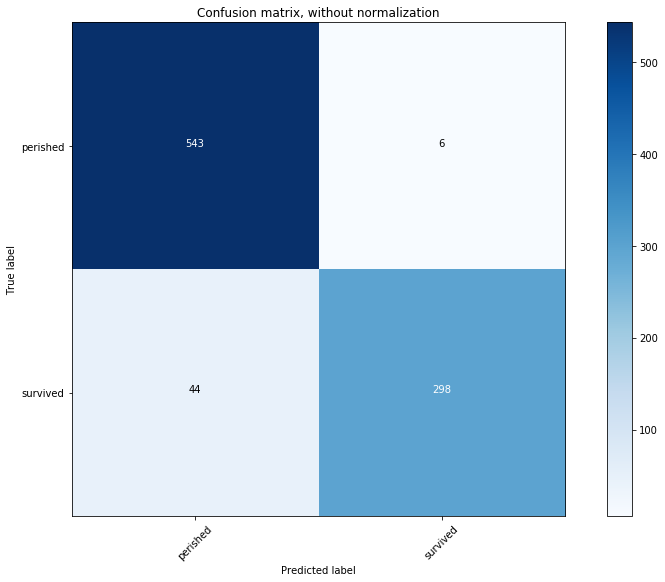

In [82]:

class_names = np.array(['perished', 'survived'])

Y_train_pred = clf.predict(X_train)
cnf_matrix = confusion_matrix(Y_train, Y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')